In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/943 (5).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/534 (7).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/81 (2).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/869 (9).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/610 (10).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/623.jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/697 (8).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/194 (4).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/435 (3).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/380 (3).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/491 (8).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/680 (8).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/323 (5).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/219 (7).jpg
/kaggle/input/real-ai-image/cifake_saya/test/SINTESIS/833 (7).jpg
/kaggle/input/

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from matplotlib import pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# GPU memory growth configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2024-04-30 06:52:35.089585: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 06:52:35.089681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 06:52:35.191621: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load Data

In [3]:
#  image dataset
data = tf.keras.utils.image_dataset_from_directory("/kaggle/input/real-ai-image/cifake_saya/train", image_size=(32, 32))

Found 100000 files belonging to 2 classes.


In [4]:
# direktory
train_path = '/kaggle/input/real-ai-image/cifake_saya/train/'
test_path = '/kaggle/input/real-ai-image/cifake_saya/test/' 

weight, height = 32, 32
batch_size = 32

train_data_gen = ImageDataGenerator(
    rescale = 1.0/255
)
test_data_gen = ImageDataGenerator(
    rescale = 1.0/255
)

train_dataset = train_data_gen.flow_from_directory(
    train_path,
    target_size = (weight, height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)
test_dataset = test_data_gen.flow_from_directory(
    test_path,
    target_size = (weight, height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = False
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [5]:
# check kelas
train_dataset.class_indices

{'ASLI': 0, 'SINTESIS': 1}

In [6]:
train_dataset.image_shape

(32, 32, 3)

## Build Model

In [7]:
# mendefinisikan model
model = models.Sequential()

# convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(weight, height, 3) ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summary model
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,833 (878.25 KB)

 Trainable params: 224,833 (878.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(train_dataset,
                    epochs = 10,
                    validation_data = test_dataset)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   3/3125 ━━━━━━━━━━━━━━━━━━━━ 3:28 67ms/step - accuracy: 0.5799 - loss: 0.6937 

I0000 00:00:1714460035.137994      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714460035.156814      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3118/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8060 - loss: 0.4123

W0000 00:00:1714460430.197852      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 501s 158ms/step - accuracy: 0.8061 - loss: 0.4121 - val_accuracy: 0.9040 - val_loss: 0.2381
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 148s 47ms/step - accuracy: 0.9040 - loss: 0.2391 - val_accuracy: 0.8971 - val_loss: 0.2437
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 110s 35ms/step - accuracy: 0.9191 - loss: 0.2036 - val_accuracy: 0.9154 - val_loss: 0.2081
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 111s 36ms/step - accuracy: 0.9294 - loss: 0.1810 - val_accuracy: 0.9186 - val_loss: 0.2046
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 114s 37ms/step - accuracy: 0.9358 - loss: 0.1641 - val_accuracy: 0.9241 - val_loss: 0.1863
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 111s 36ms/step - accuracy: 0.9426 - loss: 0.1475 - val_accuracy: 0.9303 - val_loss: 0.1862
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 111s 35ms/step - accuracy: 0.9484 - loss: 0.1310 - val_accuracy: 0.9262 - val_loss: 0.1905
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 112s 36ms/step - accuracy: 0.9550 - l

In [9]:
# buat prediksi
prediksi = model.predict(test_dataset)

625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step


In [10]:
binary_predictions = (prediksi > 0.5).astype(int)
binary_predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

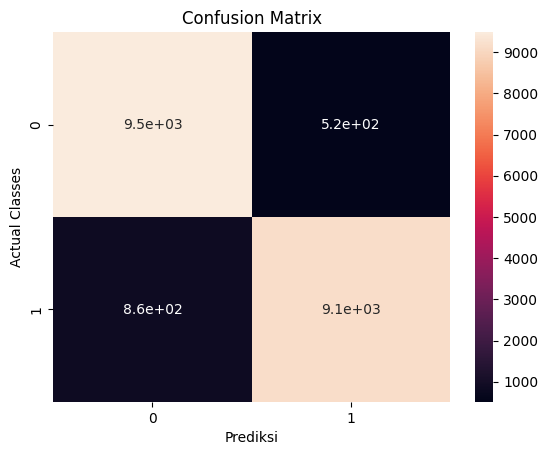

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# true label
true_labels = test_dataset.classes

# buat confussion matrix
sns.heatmap(confusion_matrix(true_labels, binary_predictions), annot=True)

# print report classification
classification_report(true_labels, binary_predictions)

plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Actual Classes")
plt.show()

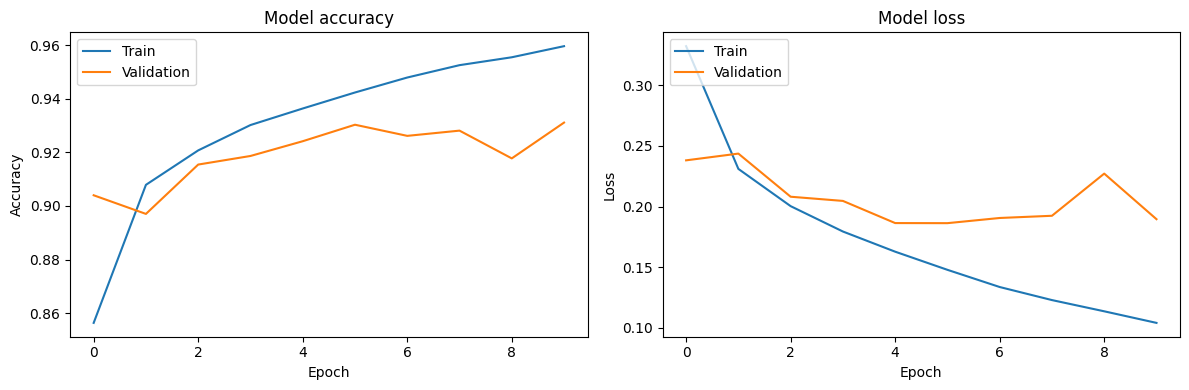

In [12]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## prediksi pada gambar

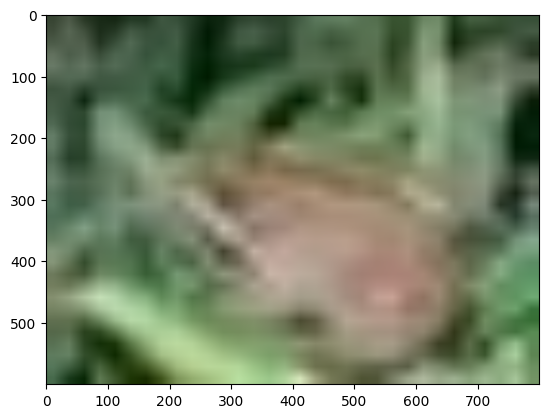

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/real-ai-image/cifake_saya/test/ASLI/0000 (7).jpg'

try:
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        raise FileNotFoundError(f"Could not read the image from {image_path}")

    # Resize the image to a larger size
    img = cv2.resize(img, (800, 600))

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the resized image
    plt.imshow(img)
    plt.show()

except Exception as e:
    print(f"Error: {e}")

In [14]:
import numpy as np
resize = tf.image.resize(img, (32, 32))

y_pred = model.predict(np.expand_dims(resize/255, 0))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


array([[0.00025718]], dtype=float32)

In [15]:
if y_pred > 0.5: 
    print(f'Predicted class: AI/Sintesis')
else:
    print(f'Predicted class: Asli')

Predicted class: Asli
